In [2]:
import pandas as pd

btc_file_path = "bitcoin_historical_data_cleaned.csv"
btc_data = pd.read_csv(btc_file_path)
btc_data.describe()


,Close,High,Low,Open,Volume
count,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03
mean,32720.074108,33397.097056,31939.574220,32680.525314,3.085689e+10
std,23705.349337,24194.384984,23145.630811,23677.004904,1.946871e+10
min,3399.470000,3427.950000,3391.020000,3401.380000,4.324201e+09
25%,10689.750000,10896.460000,10447.137500,10677.445000,1.803917e+10
50%,27794.805000,28305.765000,27245.495000,27781.830000,2.703812e+10
75%,47286.945000,48476.105000,46444.472500,47291.032500,3.818185e+10
max,106146.270000,109114.880000,105291.730000,106147.300000,3.509679e+11


In [3]:
import pandas as pd

btc_file_path = "bitcoin_historical_data_cleaned.csv"
btc_data = pd.read_csv(btc_file_path)
btc_data.iloc[:, 1:] = btc_data.iloc[:, 1:].round(3)
btc_data.to_csv(btc_file_path, index=False)


In [4]:
for col in btc_data.columns:
    if col != "Date":
        btc_data[col] = pd.to_numeric(btc_data[col], errors='coerce')
        
btc_data.dtypes

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

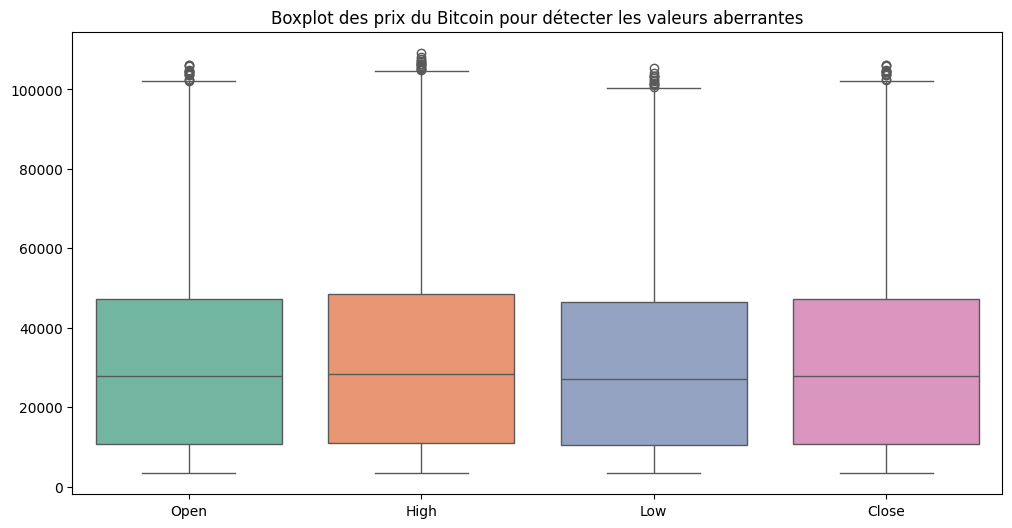

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=btc_data[['Open', 'High', 'Low', 'Close']], palette="Set2")
plt.title("Boxplot des prix du Bitcoin pour détecter les valeurs aberrantes")
plt.show()


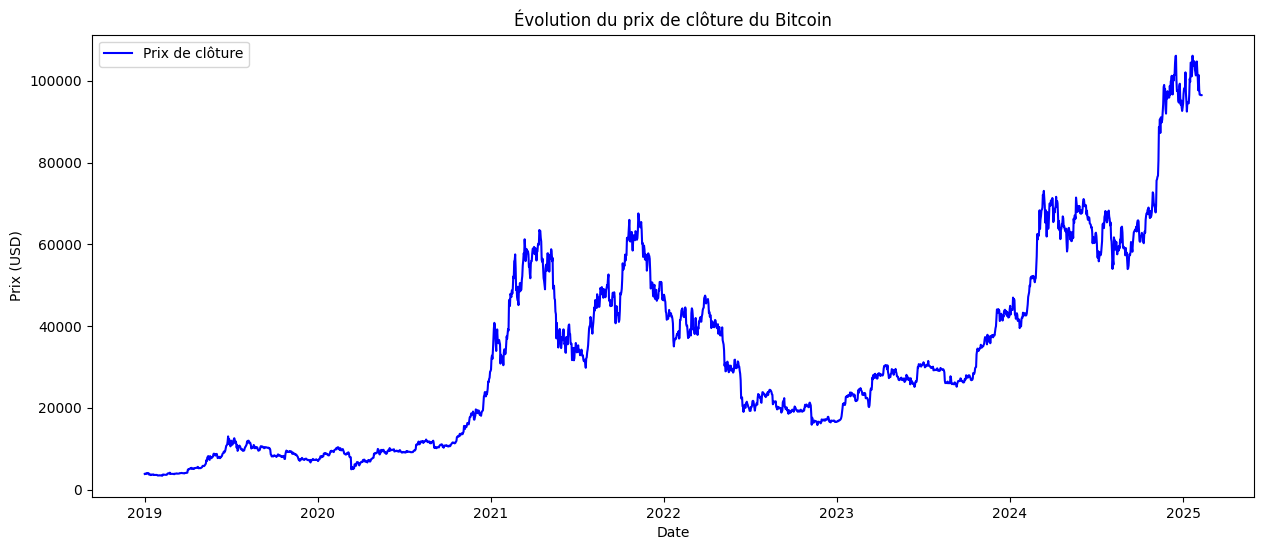

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(btc_data["Date"], btc_data["Close"], label="Prix de clôture", color="blue")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix de clôture du Bitcoin")
plt.legend()
plt.show()


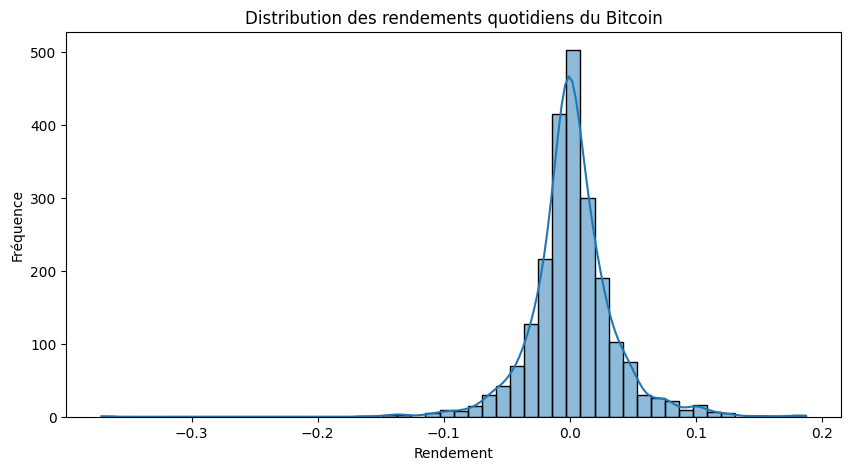

In [8]:
btc_data["Daily Return"] = btc_data["Close"].pct_change()
plt.figure(figsize=(10, 5))
sns.histplot(btc_data["Daily Return"].dropna(), bins=50, kde=True)
plt.title("Distribution des rendements quotidiens du Bitcoin")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.show()


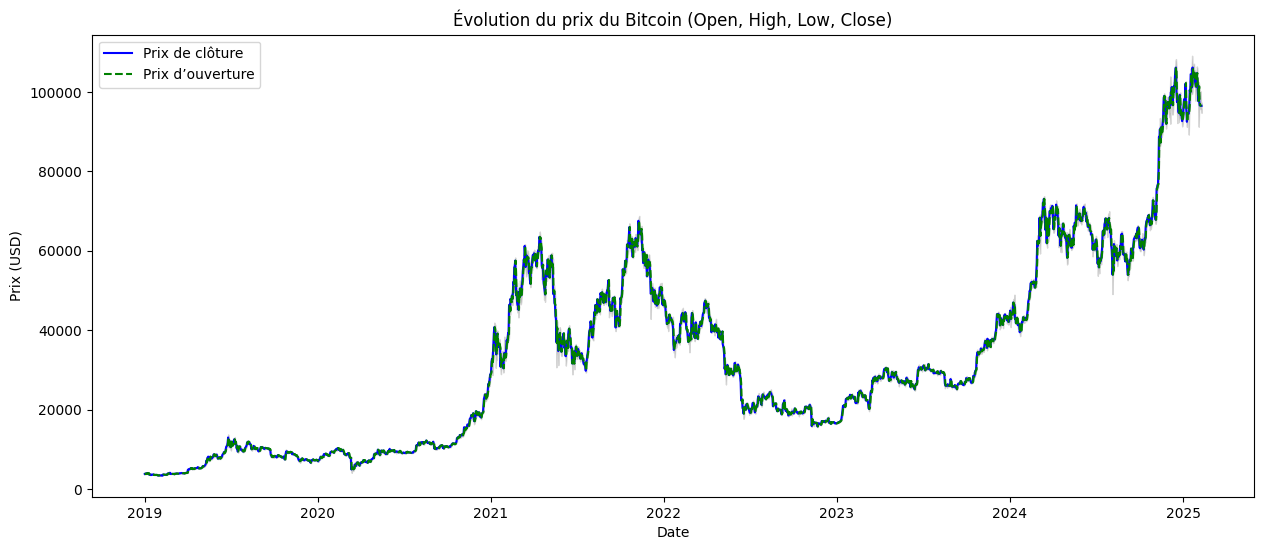

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(btc_data["Date"], btc_data["Close"], label="Prix de clôture", color="blue")
plt.plot(btc_data["Date"], btc_data["Open"], label="Prix d’ouverture", color="green", linestyle="dashed")
plt.fill_between(btc_data["Date"], btc_data["Low"], btc_data["High"], color="gray", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix du Bitcoin (Open, High, Low, Close)")
plt.legend()
plt.show()

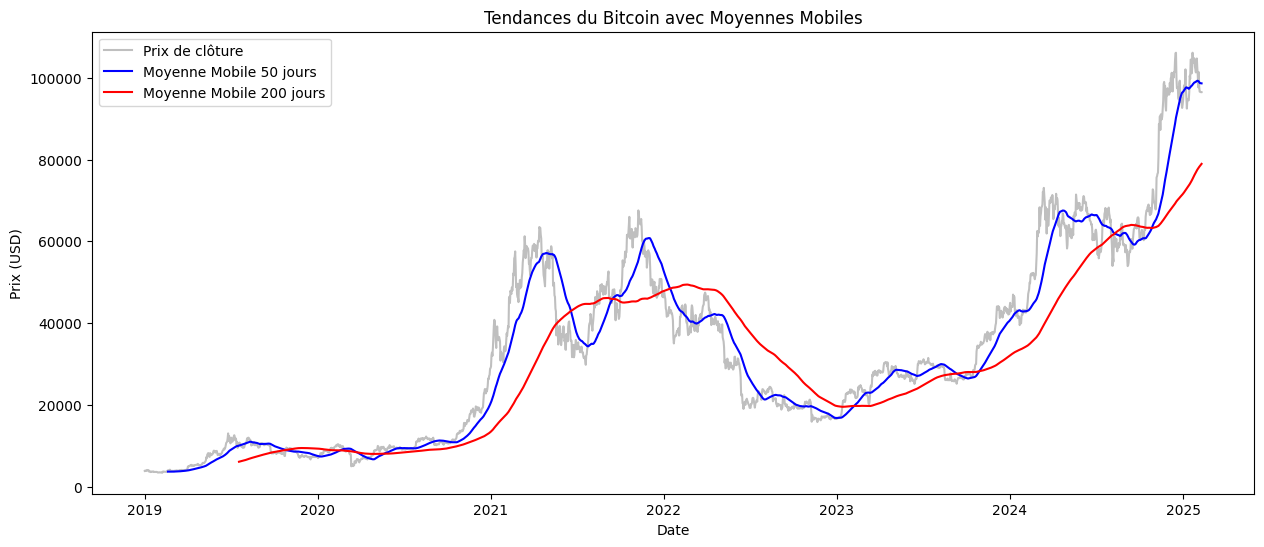

In [10]:
btc_data["SMA_50"] = btc_data["Close"].rolling(window=50).mean()
btc_data["SMA_200"] = btc_data["Close"].rolling(window=200).mean()
plt.figure(figsize=(15, 6))
plt.plot(btc_data["Date"], btc_data["Close"], label="Prix de clôture", color="gray", alpha=0.5)
plt.plot(btc_data["Date"], btc_data["SMA_50"], label="Moyenne Mobile 50 jours", color="blue")
plt.plot(btc_data["Date"], btc_data["SMA_200"], label="Moyenne Mobile 200 jours", color="red")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Tendances du Bitcoin avec Moyennes Mobiles")
plt.legend()
plt.show()

In [11]:
import pandas as pd
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']

Q1 = btc_data[numeric_cols].quantile(0.25)
Q3 = btc_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = btc_data[
    (btc_data[numeric_cols] < lower_bound) | (btc_data[numeric_cols] > upper_bound)
].dropna(how='all')

# Afficher les valeurs aberrantes
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Valeurs Aberrantes du Bitcoin", dataframe=outliers)


Valeurs Aberrantes du Bitcoin


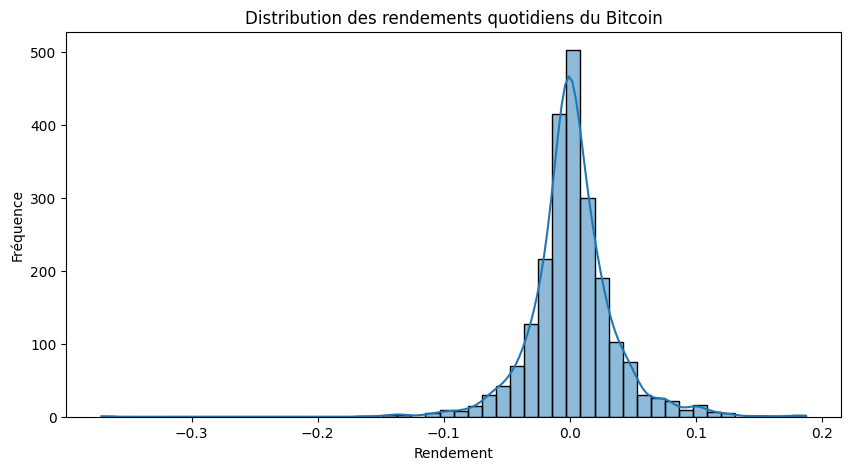

In [12]:
btc_data["Daily Return"] = btc_data["Close"].pct_change()
plt.figure(figsize=(10, 5))
sns.histplot(btc_data["Daily Return"].dropna(), bins=50, kde=True)
plt.title("Distribution des rendements quotidiens du Bitcoin")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.show()


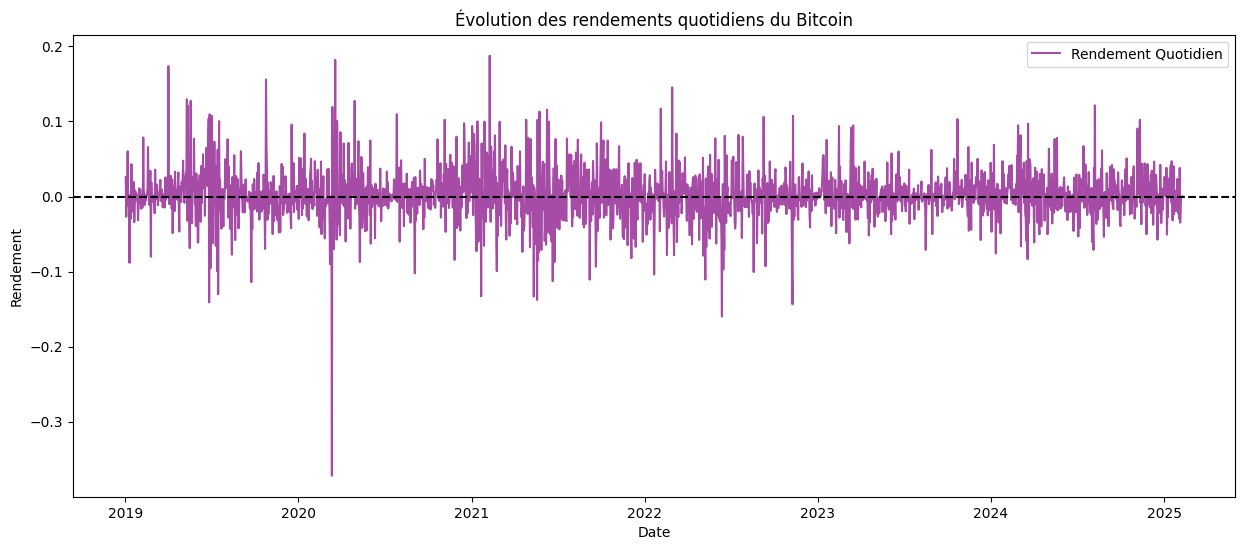

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(btc_data["Date"], btc_data["Daily Return"], label="Rendement Quotidien", color="purple", alpha=0.7)
plt.axhline(y=0, color="black", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.title("Évolution des rendements quotidiens du Bitcoin")
plt.legend()
plt.show()

In [14]:
volatility = btc_data["Daily Return"].std() * (252 ** 0.5)
print(f"Volatilité Annuelle : {volatility:.2%}")


Volatilité Annuelle : 53.52%


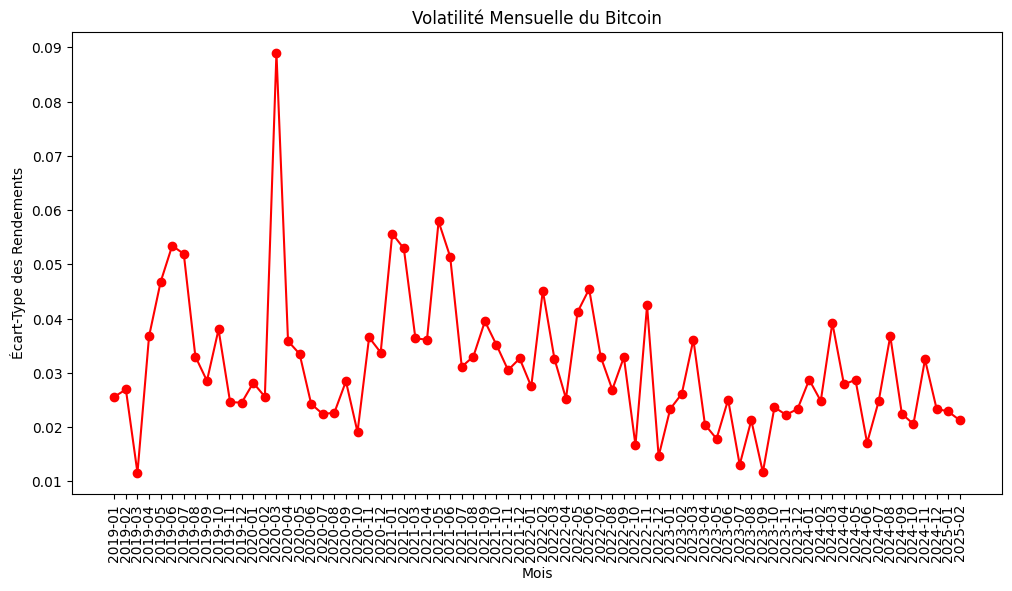

In [15]:
btc_data["Year-Month"] = btc_data["Date"].dt.to_period("M")
monthly_volatility = btc_data.groupby("Year-Month")["Daily Return"].std()
plt.figure(figsize=(12, 6))
plt.plot(monthly_volatility.index.astype(str), monthly_volatility, marker='o', color="red")
plt.xticks(rotation=90)
plt.title("Volatilité Mensuelle du Bitcoin")
plt.xlabel("Mois")
plt.ylabel("Écart-Type des Rendements")
plt.show()
